# **Data import**

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib 
from matplotlib import legend
from google.colab import drive





drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/



d0 = pd.read_csv('myocardy_complications.csv')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# **Missing values estimation**

In [ ]:

#To count the number of null elements we have 
nbr_null_elements=np.count_nonzero(np.isnan(d0))
print("Number of missing data set  in the dataset:", nbr_null_elements)


Number of missing data set  in the dataset: 15974


# **Missing values imputation**

In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp.fit(d0)
d0_imputed=imp.transform(d0)
y=d0_imputed[:,123]
d0_imputed =np.delete(d0_imputed,-1,axis=1)
print(d0_imputed.shape)


(1700, 123)


# **Some data visualization with Seaborn**

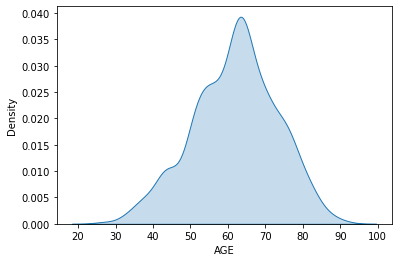

In [ ]:
import seaborn as sns
sns.kdeplot(d0['AGE'],shade=True)
plt.show()


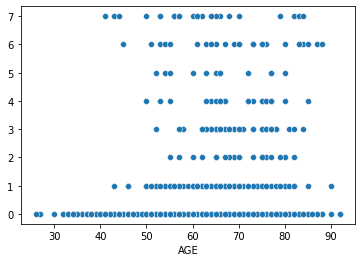

In [ ]:
sns.scatterplot(x=d0['AGE'],y=y,data=d0)


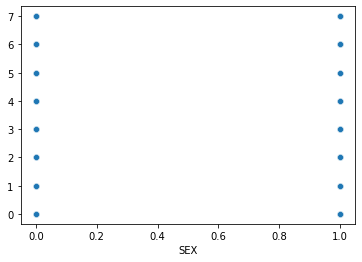

In [ ]:
sns.scatterplot(x=d0['SEX'],y=y,data=d0)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


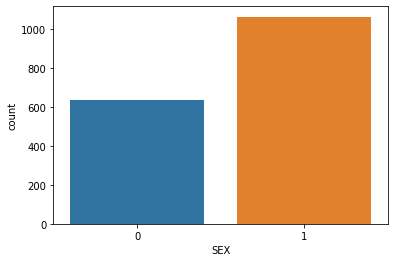

In [ ]:

!pip install texttable
from texttable import Texttable



# texttable takes the first reocrd in the list as the column names
# of the table
l_gender = [["Code", "Gender"], [0,"Female"],[1,"Male"]]

table_gender = Texttable()
table_gender.add_rows(l_gender)



sn.countplot(d0['SEX'])
plt.show()




# **Checking how many NaN values we have left**

In [ ]:

#To count the number of null elements remaining
nbr_null_elements=np.count_nonzero(np.isnan(d0_imputed))
print("Number of null elements left in the dataset:", nbr_null_elements)


Number of null elements left in the dataset: 0


# **Draw a corresponding table between the lethal outcome causes and their code**

In [ ]:

# texttable takes the first reocrd in the list as the column names
# of the table
l = [["Code", "Cause of lethal outcome"], [0,"unknown"],[1,"Cardiogenic shock"],[2,"Pulmonary rupture"],[3,"Myocardial rupture"],[4,"Progress of congestive heart failure"],[5,"Thromboembolism"],[6,"Asystole"],[7,"Ventricular fibrillation"]]

table = Texttable()
table.add_rows(l)


# **Applying PCA and visualizing data with the 1st and 2nd component**

(1700, 123)
shape of pca_reduced.shape =  (1700, 8)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


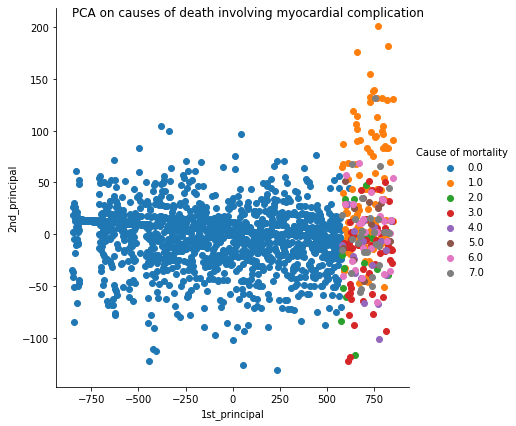

+------+--------------------------------------+
| Code |       Cause of lethal outcome        |
+======+======================================+
| 0    | unknown                              |
+------+--------------------------------------+
| 1    | Cardiogenic shock                    |
+------+--------------------------------------+
| 2    | Pulmonary rupture                    |
+------+--------------------------------------+
| 3    | Myocardial rupture                   |
+------+--------------------------------------+
| 4    | Progress of congestive heart failure |
+------+--------------------------------------+
| 5    | Thromboembolism                      |
+------+--------------------------------------+
| 6    | Asystole                             |
+------+--------------------------------------+
| 7    | Ventricular fibrillation             |
+------+--------------------------------------+


In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


pca.n_components = 8
print(d0_imputed.shape)
pca_data = pca.fit_transform(d0_imputed)
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

pca_data_stacked = np.vstack((pca_data[:,0:2].T, y)).T

import seaborn as sn
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data_stacked, columns=("1st_principal", "2nd_principal","label"))
g=sn.FacetGrid(pca_df,hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend(title="Cause of mortality")
g.fig.suptitle("PCA on causes of death involving myocardial complication")

plt.show()
print(table.draw())




# **Applying PCA and visualizing data with the 3rd and 4th component**



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


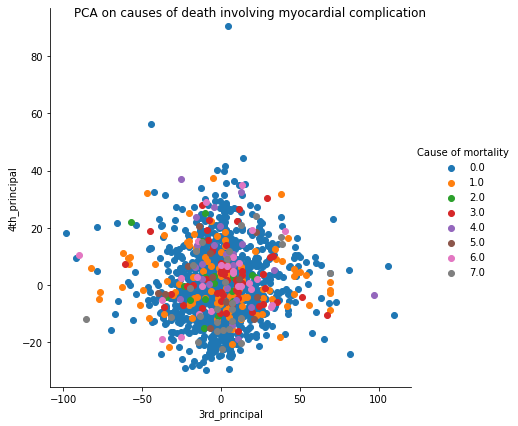

+------+--------------------------------------+
| Code |       Cause of lethal outcome        |
+======+======================================+
| 0    | unknown                              |
+------+--------------------------------------+
| 1    | Cardiogenic shock                    |
+------+--------------------------------------+
| 2    | Pulmonary rupture                    |
+------+--------------------------------------+
| 3    | Myocardial rupture                   |
+------+--------------------------------------+
| 4    | Progress of congestive heart failure |
+------+--------------------------------------+
| 5    | Thromboembolism                      |
+------+--------------------------------------+
| 6    | Asystole                             |
+------+--------------------------------------+
| 7    | Ventricular fibrillation             |
+------+--------------------------------------+


In [ ]:
pca_data_stacked_4 = np.vstack((pca_data[:,2:4].T, y)).T
pca_df = pd.DataFrame(data=pca_data_stacked_4, columns=("3rd_principal", "4th_principal","label"))
g=sn.FacetGrid(pca_df,hue="label", size=6).map(plt.scatter, '3rd_principal', '4th_principal').add_legend(title="Cause of mortality")
g.fig.suptitle("PCA on causes of death involving myocardial complication")

plt.show()
print(table.draw())


# **Applying PCA and visualizing data with the 4th and 5th component**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


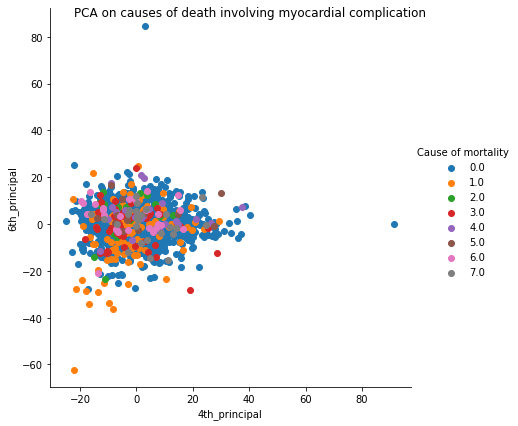

+------+--------------------------------------+
| Code |       Cause of lethal outcome        |
+======+======================================+
| 0    | unknown                              |
+------+--------------------------------------+
| 1    | Cardiogenic shock                    |
+------+--------------------------------------+
| 2    | Pulmonary rupture                    |
+------+--------------------------------------+
| 3    | Myocardial rupture                   |
+------+--------------------------------------+
| 4    | Progress of congestive heart failure |
+------+--------------------------------------+
| 5    | Thromboembolism                      |
+------+--------------------------------------+
| 6    | Asystole                             |
+------+--------------------------------------+
| 7    | Ventricular fibrillation             |
+------+--------------------------------------+


In [ ]:
pca_data_stacked_6 = np.vstack((pca_data[:,4:6].T, y)).T

pca_df = pd.DataFrame(data=pca_data_stacked_6, columns=("4th_principal", "6th_principal","label"))
g=sn.FacetGrid(pca_df,hue="label", size=6).map(plt.scatter, '4th_principal', '6th_principal').add_legend(title="Cause of mortality")
g.fig.suptitle("PCA on causes of death involving myocardial complication")

plt.show()
print(table.draw())


# **Applying Kmean algorithm**

[2 2 2 ... 4 4 4]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


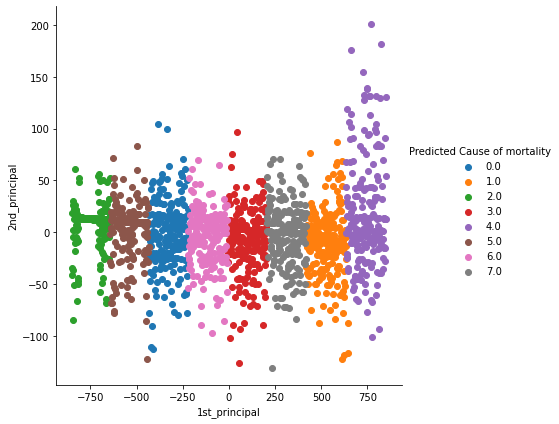

kmeans with 2 components done! Time elapsed: 0.4452335834503174 seconds
+------+--------------------------------------+
| Code |       Cause of lethal outcome        |
+======+======================================+
| 0    | unknown                              |
+------+--------------------------------------+
| 1    | Cardiogenic shock                    |
+------+--------------------------------------+
| 2    | Pulmonary rupture                    |
+------+--------------------------------------+
| 3    | Myocardial rupture                   |
+------+--------------------------------------+
| 4    | Progress of congestive heart failure |
+------+--------------------------------------+
| 5    | Thromboembolism                      |
+------+--------------------------------------+
| 6    | Asystole                             |
+------+--------------------------------------+
| 7    | Ventricular fibrillation             |
+------+--------------------------------------+


In [ ]:
import time

from sklearn.cluster import KMeans
time_start = time.time()
kmeans = KMeans(n_clusters=8, random_state=0).fit(pca_data[:,0:2])
predicted_labels=kmeans.labels_
print(predicted_labels)
pca_data_stacked_kmeans = np.vstack((pca_data[:,0:2].T, predicted_labels)).T
pca_df = pd.DataFrame(data=pca_data_stacked_kmeans, columns=("1st_principal", "2nd_principal","predicted_labels"))
g=sn.FacetGrid(pca_df,hue="predicted_labels", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend(title="Predicted Cause of mortality")
plt.show()

print ('kmeans with 2 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print(table.draw())

(569136,)


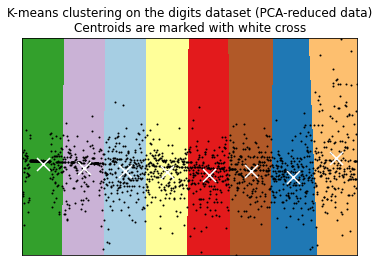

In [ ]:
def plot_prediction(pca_data,clustering_algorithm):
  h=1
  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
  y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  print(xx.ravel().shape)
  Z = clustering_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1)
  plt.clf()
  plt.imshow(Z, interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired,
            aspect='auto', origin='lower')

  plt.plot(pca_data[:, 0], pca_data[:, 1], 'k.', markersize=2)
  # Plot the centroids as a white X
  centroids = clustering_algorithm.cluster_centers_
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='x', s=169, linewidths=3,
              color='w', zorder=10)
  plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
            'Centroids are marked with white cross')
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())
  plt.show()
  
plot_prediction(pca_data,kmeans)

# **Applying MeanShift clustering algorithm**

number of estimated clusters : 5


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


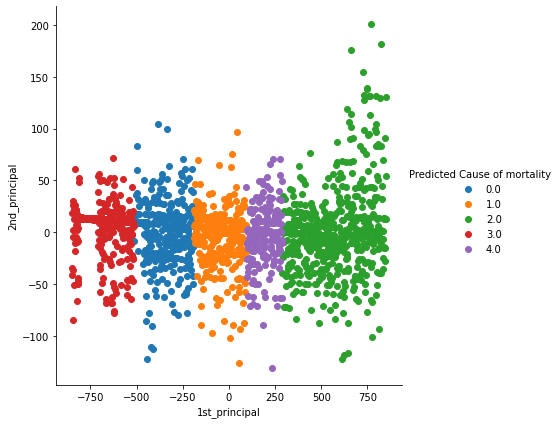

kmeans with 2 components done! Time elapsed: 0.4867844581604004 seconds
+------+--------------------------------------+
| Code |       Cause of lethal outcome        |
+======+======================================+
| 0    | unknown                              |
+------+--------------------------------------+
| 1    | Cardiogenic shock                    |
+------+--------------------------------------+
| 2    | Pulmonary rupture                    |
+------+--------------------------------------+
| 3    | Myocardial rupture                   |
+------+--------------------------------------+
| 4    | Progress of congestive heart failure |
+------+--------------------------------------+
| 5    | Thromboembolism                      |
+------+--------------------------------------+
| 6    | Asystole                             |
+------+--------------------------------------+
| 7    | Ventricular fibrillation             |
+------+--------------------------------------+
(569136,)


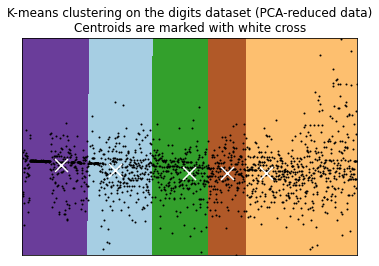

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(pca_data[:,0:2], quantile=0.2, n_samples=pca_data.shape[0])
time_start = time.time()

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_data[:,0:2])
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

pca_data_stacked_shift = np.vstack((pca_data[:,0:2].T, labels)).T
pca_df = pd.DataFrame(data=pca_data_stacked_shift, columns=("1st_principal", "2nd_principal","predicted_labels"))
g=sn.FacetGrid(pca_df,hue="predicted_labels", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend(title="Predicted Cause of mortality")
plt.show()
print ('MeanShift with 2 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print(table.draw())


plot_prediction(pca_data,ms)

In [ ]:
from sklearn.manifold import TSNE

pca_data_embedded=TSNE(n_components=2).fit_transform(pca_data)
print(pca_data_embedded.shape)



(1700, 2)


# **Applying  t-SNE on dimension-reduced data**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


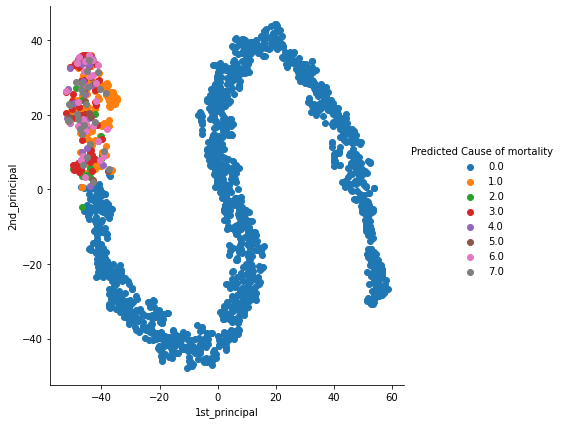

+------+--------------------------------------+
| Code |       Cause of lethal outcome        |
+======+======================================+
| 0    | unknown                              |
+------+--------------------------------------+
| 1    | Cardiogenic shock                    |
+------+--------------------------------------+
| 2    | Pulmonary rupture                    |
+------+--------------------------------------+
| 3    | Myocardial rupture                   |
+------+--------------------------------------+
| 4    | Progress of congestive heart failure |
+------+--------------------------------------+
| 5    | Thromboembolism                      |
+------+--------------------------------------+
| 6    | Asystole                             |
+------+--------------------------------------+
| 7    | Ventricular fibrillation             |
+------+--------------------------------------+


In [ ]:
pca_data_stacked_manifold = np.vstack((pca_data_embedded.T, y)).T
pca_df = pd.DataFrame(data=pca_data_stacked_manifold, columns=("1st_principal", "2nd_principal","predicted_labels"))
g=sn.FacetGrid(pca_df,hue="predicted_labels", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend(title="Predicted Cause of mortality")
plt.show()
print(table.draw())


  Cloning https://github.com/j-bac/scikit-dimension.git to /tmp/pip-req-build-g4le4_h3
  Running command git clone -q https://github.com/j-bac/scikit-dimension.git /tmp/pip-req-build-g4le4_h3
  Created wheel for skdim: filename=skdim-0.1.1-cp36-none-any.whl size=63879 sha256=74f4fdc6ba9f98a4e06b6a3e0c0478fdb4ae2f3281ad55be0d012a72d3144b85
  Stored in directory: /tmp/pip-ephem-wheel-cache-cwmrhc_8/wheels/13/cc/a5/29084b1dc11779e4e314c134c1a30c3d6fe798e541fcf2624b
Successfully built skdim
7.139453537082399


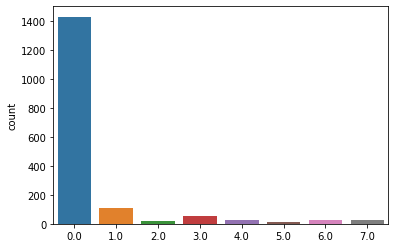

In [ ]:


!pip install git+https://github.com/j-bac/scikit-dimension.git



# **Estimation de la dimension intrinsèque globale**

In [ ]:
#Estimation of the global ntrinsic dimensionality

import skdim
danco = skdim.id.DANCo().fit(d0_imputed)
print(danco.dimension_)

import seaborn as sns
sns.countplot(y)
plt.show()

ModuleNotFoundError: ignored

# **Matrix factorization using NMF**

In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
print(d0_imputed.shape)
time_start = time.time()
W = model.fit_transform(d0_imputed.transpose())
print ('NMF factorization us done! Time elapsed: {} seconds'.format(time.time()-time_start))

H = model.components_
print(H.shape)

NameError: ignored

# **Data visualization after NMF**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


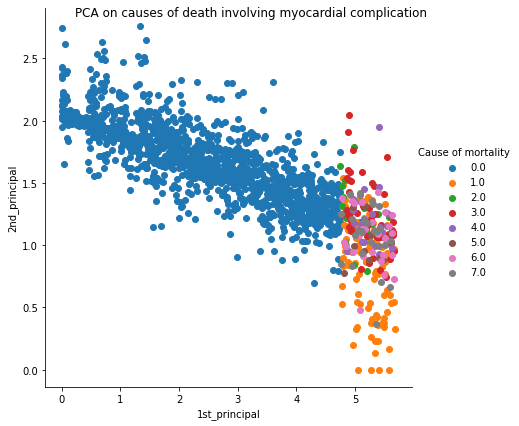

+------+--------------------------------------+
| Code |       Cause of lethal outcome        |
+======+======================================+
| 0    | unknown                              |
+------+--------------------------------------+
| 1    | Cardiogenic shock                    |
+------+--------------------------------------+
| 2    | Pulmonary rupture                    |
+------+--------------------------------------+
| 3    | Myocardial rupture                   |
+------+--------------------------------------+
| 4    | Progress of congestive heart failure |
+------+--------------------------------------+
| 5    | Thromboembolism                      |
+------+--------------------------------------+
| 6    | Asystole                             |
+------+--------------------------------------+
| 7    | Ventricular fibrillation             |
+------+--------------------------------------+


In [ ]:
# creating a new data fram which help us in ploting the result data

pca_data_stacked_nmf = np.vstack((H, y)).T
pca_df = pd.DataFrame(data=pca_data_stacked_nmf, columns=("1st_principal", "2nd_principal","label"))
g=sn.FacetGrid(pca_df,hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend(title="Cause of mortality")
g.fig.suptitle("PCA on causes of death involving myocardial complication")
plt.show()
print(table.draw())
